# 3) 评估与消融可视化（Recall@K / NDCG@K / 特征重要性）

> 图表要求：使用 matplotlib、每个图单独绘制、不要设定特定颜色。

In [2]:

import pandas as pd, numpy as np, os, matplotlib.pyplot as plt

OUTDIR = '/Users/ringscherry/Desktop'

metrics = pd.read_csv(f'{OUTDIR}/metrics_ablation.csv')
metrics
    

,setting,recall_at_50,ndcg_at_50
0,A1_covisit_only_NoRank,0.1804,0.100642
1,A1_multi_NoRank,0.2336,0.135960
2,A2_multi_Ranker,0.2658,0.175836


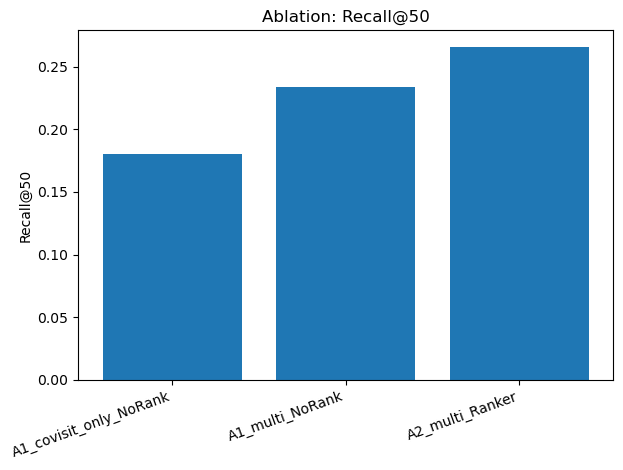

In [3]:

# 图1：Recall@50 消融柱状图
plt.figure()
x = np.arange(len(metrics))
vals = metrics['recall_at_50'].values
plt.bar(x, vals)
plt.xticks(x, metrics['setting'], rotation=20, ha='right')
plt.title('Ablation: Recall@50')
plt.ylabel('Recall@50')
plt.tight_layout()
plt.show()
    

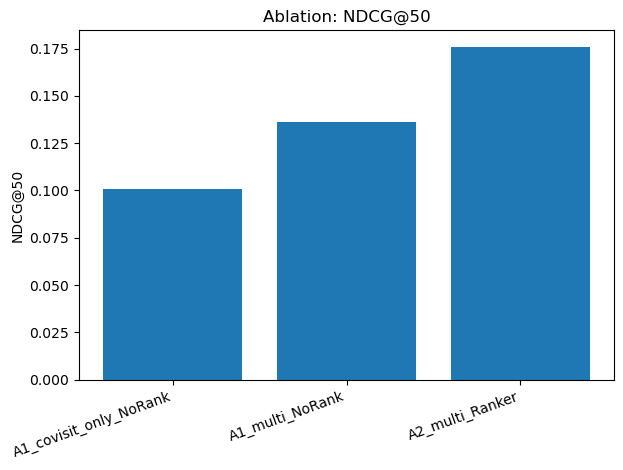

In [4]:

# 图2：NDCG@50 消融柱状图
plt.figure()
x = np.arange(len(metrics))
vals = metrics['ndcg_at_50'].values
plt.bar(x, vals)
plt.xticks(x, metrics['setting'], rotation=20, ha='right')
plt.title('Ablation: NDCG@50')
plt.ylabel('NDCG@50')
plt.tight_layout()
plt.show()
    

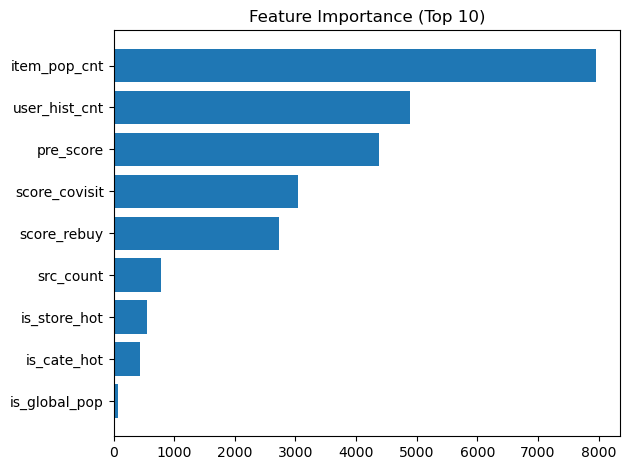

In [5]:

# （可选）图3：LightGBM 特征重要性 Top10
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np

fi_path = f'{OUTDIR}/feature_importance.csv'
if os.path.exists(fi_path):
    fi = pd.read_csv(fi_path).sort_values('importance', ascending=False).head(10)
    plt.figure()
    plt.barh(fi['feature'][::-1], fi['importance'][::-1])
    plt.title('Feature Importance (Top 10)')
    plt.tight_layout()
    plt.show()
else:
    print('feature_importance.csv not found (LightGBM may not be installed).')
    